# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 3
### Due Date: Sunday, Jun 1st, 2025
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


# Your Name: Anastasiia Poverenova

## Question 1 [20 marks]: Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Write Python code to use `requests` to read in the tables. Write programs to answer the following questions.
1. How many tables have you read in? List the columns of the DataFrames that contain the population data.
2.For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.
3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?
4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result.
6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [1]:
# Import packages
import requests
import pandas as pd

In [2]:
# Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"


In [3]:
# Read all tables
tables = pd.read_html(url)
tables

[    Country (or dependent territory)        2024        2030        2050  \
 0                              World  8118836000  8546141000  9709492000   
 1                               Asia  4785060000  4958807000  5292948000   
 2                             Africa  1494994000  1710666000  2485136000   
 3                 Sub-Saharan Africa  1226534000  1417346000  2111548000   
 4        Central Asia and South Asia  2128585000  2258687000  2580042000   
 ..                               ...         ...         ...         ...   
 253                        Venezuela    29395334    32027461    35937404   
 254                          Vietnam    99497680   102699905   107012939   
 255                            Yemen    35219853    39923245    55296331   
 256                           Zambia    21314956    25024901    38083385   
 257                         Zimbabwe    16634373    18610348    25866385   
 
             2100  
 0    10349323000  
 1     4674249000  
 2     3924421

In [4]:
# Extract only the desired tables
past_table = tables[1]
present_table = tables[2]
future_table = tables[3]

In [5]:
# Preview 1st table
past_table.head()

Country (or dependent territory)  1950  1955     %   1960   %.1   1965  \
0                      Afghanistan  8151  8892  1.76   9830  2.03  10998   
1                          Albania  1228  1393  2.56   1624  3.12   1884   
2                          Algeria  8893  9842  2.05  10910  2.08  11964   
3                   American Samoa    20    20  0.72     21  0.20     25   
4                          Andorra     7     7  0.04      9  6.28     14   

     %.2   1970   %.3   1975   %.4   1980   %.5  
0   2.27  12431  2.48  14133  2.60  15045  1.26  
1   3.02   2157  2.74   2402  2.17   2672  2.16  
2   1.86  13932  3.09  16141  2.99  18807  3.10  
3   4.23     28  2.08     30  1.68     33  1.80  
4  10.17     20  7.49     27  6.32     34  4.81

In [6]:
# Preview 2nd table
present_table.head()

Country (or dependent territory)   1985     %   1990   %.1   1995   %.2  \
0                      Afghanistan  13120 -2.70  13569  0.67  19446  7.46   
1                          Albania   2957  2.05   3245  1.88   3159 -0.54   
2                          Algeria  22009  3.19  25191  2.74  28322  2.37   
3                   American Samoa     39  3.57     48  4.09     54  2.69   
4                          Andorra     45  5.84     53  3.41     64  3.70   

    2000   %.3   2005   %.4   2010   %.5   2015   %.6  
0  22462  2.93  26335  3.23  29121  2.03  32565  2.26  
1   3159  0.00   3025 -0.86   2987 -0.25   3030  0.28  
2  30639  1.58  32918  1.45  35950  1.78  39543  1.92  
3     58  1.39     57 -0.28     56 -0.53     55 -0.41  
4     66  0.58     77  3.18     85  2.12     86  0.25

In [7]:
# Preview 3rd table
future_table.head()

Country (or dependent territory)   2020     %   2025   %.1   2030   %.2  \
0                      Afghanistan  36644  2.39  41118  2.33  45665  2.12   
1                          Albania   3075  0.30   3105  0.20   3103 -0.01   
2                          Algeria  42973  1.68  45842  1.30  48149  0.99   
3                   American Samoa     54 -0.21     54 -0.17     53 -0.32   
4                          Andorra     86  0.01     86 -0.12     85 -0.21   

    2035   %.3   2040   %.4   2045   %.5   2050   %.6  
0  50195  1.91  54717  1.74  59256  1.61  63796  1.49  
1   3063 -0.26   2994 -0.45   2913 -0.55   2825 -0.61  
2  50118  0.80  52030  0.75  53894  0.71  55445  0.57  
3     52 -0.45     51 -0.45     50 -0.29     50 -0.06  
4     83 -0.30     82 -0.46     79 -0.69     75 -0.93

## Answers:

1. How many tables have you read in? List the columns of the DataFrames that contain the population data.


In [8]:
# Extract only the desired tables
population_tables = tables[1:4]
print(f"Number of population tables read: {len(population_tables)}")

Number of population tables read: 3


In [9]:
# List the column names of each DataFrame
for i in range(len(population_tables)):
    print(f"\nTable {i+2} Columns:")  # +2 to reflect original table numbers on Wikipedia
    print(population_tables[i].columns.tolist())


Table 2 Columns:
['Country (or dependent territory)', '1950', '1955', '%', '1960', '%.1', '1965', '%.2', '1970', '%.3', '1975', '%.4', '1980', '%.5']

Table 3 Columns:
['Country (or dependent territory)', '1985', '%', '1990', '%.1', '1995', '%.2', '2000', '%.3', '2005', '%.4', '2010', '%.5', '2015', '%.6']

Table 4 Columns:
['Country (or dependent territory)', '2020', '%', '2025', '%.1', '2030', '%.2', '2035', '%.3', '2040', '%.4', '2045', '%.5', '2050', '%.6']


2. For each population DataFrame, rename the column names of average annual growth to meaningful and unique names.

In [10]:
# Function to relabel columns based on their position
def relabel_population_columns(df):
  new_cols = []
  cols = df.columns.tolist()
  i = 0
  while i < len(cols):
    col = cols[i]
    if col == 'Country (or dependent territory)':
      new_cols.append('Country')
      i += 1
    elif '%' in str(col):
      prev_year = new_cols[-1]
      new_cols.append(f"Growth_{int(prev_year)-5}_{prev_year}")
      i += 1
    else:
      new_cols.append(col)  # Year stays unchanged
      i += 1
  df.columns = new_cols

# Apply to all 3 tables
relabel_population_columns(population_tables[0])
relabel_population_columns(population_tables[1])
relabel_population_columns(population_tables[2])

# Optional: Check result
for df in population_tables:
  print(df.columns.tolist())

['Country', '1950', '1955', 'Growth_1950_1955', '1960', 'Growth_1955_1960', '1965', 'Growth_1960_1965', '1970', 'Growth_1965_1970', '1975', 'Growth_1970_1975', '1980', 'Growth_1975_1980']
['Country', '1985', 'Growth_1980_1985', '1990', 'Growth_1985_1990', '1995', 'Growth_1990_1995', '2000', 'Growth_1995_2000', '2005', 'Growth_2000_2005', '2010', 'Growth_2005_2010', '2015', 'Growth_2010_2015']
['Country', '2020', 'Growth_2015_2020', '2025', 'Growth_2020_2025', '2030', 'Growth_2025_2030', '2035', 'Growth_2030_2035', '2040', 'Growth_2035_2040', '2045', 'Growth_2040_2045', '2050', 'Growth_2045_2050']


In [11]:
# Display results - first 5 rows
past_table.head()

Country  1950  1955  Growth_1950_1955   1960  Growth_1955_1960  \
0     Afghanistan  8151  8892              1.76   9830              2.03   
1         Albania  1228  1393              2.56   1624              3.12   
2         Algeria  8893  9842              2.05  10910              2.08   
3  American Samoa    20    20              0.72     21              0.20   
4         Andorra     7     7              0.04      9              6.28   

    1965  Growth_1960_1965   1970  Growth_1965_1970   1975  Growth_1970_1975  \
0  10998              2.27  12431              2.48  14133              2.60   
1   1884              3.02   2157              2.74   2402              2.17   
2  11964              1.86  13932              3.09  16141              2.99   
3     25              4.23     28              2.08     30              1.68   
4     14             10.17     20              7.49     27              6.32   

    1980  Growth_1975_1980  
0  15045              1.26  
1   2672              2.16  
2  18807              3.10  
3     33              1.80  
4     34              4.81

In [12]:
# Display results - first 5 rows
present_table.head()

Country   1985  Growth_1980_1985   1990  Growth_1985_1990   1995  \
0     Afghanistan  13120             -2.70  13569              0.67  19446   
1         Albania   2957              2.05   3245              1.88   3159   
2         Algeria  22009              3.19  25191              2.74  28322   
3  American Samoa     39              3.57     48              4.09     54   
4         Andorra     45              5.84     53              3.41     64   

   Growth_1990_1995   2000  Growth_1995_2000   2005  Growth_2000_2005   2010  \
0              7.46  22462              2.93  26335              3.23  29121   
1             -0.54   3159              0.00   3025             -0.86   2987   
2              2.37  30639              1.58  32918              1.45  35950   
3              2.69     58              1.39     57             -0.28     56   
4              3.70     66              0.58     77              3.18     85   

   Growth_2005_2010   2015  Growth_2010_2015  
0              2.03  32565              2.26  
1             -0.25   3030              0.28  
2              1.78  39543              1.92  
3             -0.53     55             -0.41  
4              2.12     86              0.25

In [13]:
# Display results - first 5 rows
future_table.head()

Country   2020  Growth_2015_2020   2025  Growth_2020_2025   2030  \
0     Afghanistan  36644              2.39  41118              2.33  45665   
1         Albania   3075              0.30   3105              0.20   3103   
2         Algeria  42973              1.68  45842              1.30  48149   
3  American Samoa     54             -0.21     54             -0.17     53   
4         Andorra     86              0.01     86             -0.12     85   

   Growth_2025_2030   2035  Growth_2030_2035   2040  Growth_2035_2040   2045  \
0              2.12  50195              1.91  54717              1.74  59256   
1             -0.01   3063             -0.26   2994             -0.45   2913   
2              0.99  50118              0.80  52030              0.75  53894   
3             -0.32     52             -0.45     51             -0.45     50   
4             -0.21     83             -0.30     82             -0.46     79   

   Growth_2040_2045   2050  Growth_2045_2050  
0              1.61  63796              1.49  
1             -0.55   2825             -0.61  
2              0.71  55445              0.57  
3             -0.29     50             -0.06  
4             -0.69     75             -0.93

3. Create a DataFrame containing all the data from the population tables. i.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. How many rows and columns in the final combined DataFrame?

In [14]:
# Standardize country column name
for df in population_tables:
  df.rename(columns={df.columns[0]: 'Country'}, inplace=True)

In [15]:
# Step 2: Merge the three tables on 'Country' using outer join to preserve all data
merged_df = population_tables[0].merge(
    population_tables[1], on='Country', how='outer'
).merge(
    population_tables[2], on='Country', how='outer'
)

In [16]:
# Step 3: Show the shape (rows, columns)
print(f"Final combined DataFrame shape: {merged_df.shape}")

Final combined DataFrame shape: (228, 42)


In [17]:
# Display 5 first rows
merged_df.head()

Country  1950  1955  Growth_1950_1955   1960  Growth_1955_1960  \
0     Afghanistan  8151  8892              1.76   9830              2.03   
1         Albania  1228  1393              2.56   1624              3.12   
2         Algeria  8893  9842              2.05  10910              2.08   
3  American Samoa    20    20              0.72     21              0.20   
4         Andorra     7     7              0.04      9              6.28   

    1965  Growth_1960_1965   1970  Growth_1965_1970  ...   2030  \
0  10998              2.27  12431              2.48  ...  45665   
1   1884              3.02   2157              2.74  ...   3103   
2  11964              1.86  13932              3.09  ...  48149   
3     25              4.23     28              2.08  ...     53   
4     14             10.17     20              7.49  ...     85   

   Growth_2025_2030   2035  Growth_2030_2035   2040  Growth_2035_2040   2045  \
0              2.12  50195              1.91  54717              1.74  59256   
1             -0.01   3063             -0.26   2994             -0.45   2913   
2              0.99  50118              0.80  52030              0.75  53894   
3             -0.32     52             -0.45     51             -0.45     50   
4             -0.21     83             -0.30     82             -0.46     79   

   Growth_2040_2045   2050  Growth_2045_2050  
0              1.61  63796              1.49  
1             -0.55   2825             -0.61  
2              0.71  55445              0.57  
3             -0.29     50             -0.06  
4             -0.69     75             -0.93  

[5 rows x 42 columns]

4. For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result: ![](https://i.imgur.com/6W9RuZO.png)

In [18]:
import matplotlib.pyplot as plt

In [19]:
# Filter out "World" row from the dataset
filtered_df = merged_df[merged_df['Country'] != 'World']

In [20]:
# Extract all year columns
year_cols = sorted([col for col in merged_df.columns if col.isdigit()], key=int)
year_cols

['1950',
 '1955',
 '1960',
 '1965',
 '1970',
 '1975',
 '1980',
 '1985',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050']

In [21]:
# Get top 10 countries by population in 1950
top10 = filtered_df[['Country', '1950']].sort_values(by='1950', ascending=False).head(10)
top10_countries = top10['Country'].tolist()

In [22]:
# Filter to top 10 countries
top10_df = filtered_df[filtered_df['Country'].isin(top10_countries)]
top10_df

Country    1950    1955  Growth_1950_1955    1960  \
27           Brazil   53444   61652              2.90   71412   
41            China  562580  607047              1.53  651340   
73          Germany   68375   70196              0.53   72481   
90            India  369881  404268              1.79  445394   
91        Indonesia   82979   90255              1.70  100146   
97            Italy   47106   48634              0.64   50198   
100           Japan   83806   89816              1.39   94092   
165          Russia  101937  111126              1.74  119632   
214  United Kingdom   50128   50947              0.32   52373   
215   United States  151869  165070              1.68  179980   

     Growth_1955_1960    1965  Growth_1960_1965    1970  Growth_1965_1970  \
27               2.98   82602              2.95   94931              2.82   
41               1.42  716667              1.93  822116              2.78   
73               0.64   75639              0.86   77784              0.56   
90               1.96  494964              2.13  553889              2.28   
91               2.10  110754              2.03  122292              2.00   
97               0.64   51988              0.70   53662              0.64   
100              0.93   98883              1.00  104345              1.08   
165              1.49  126542              1.13  130246              0.58   
214              0.55   54351              0.74   55633              0.47   
215              1.74  193527              1.46  203985              1.06   

     ...     2030  Growth_2025_2030     2035  Growth_2030_2035     2040  \
27   ...   228720              0.51   233068              0.39   236077   
41   ...  1419019              0.54  1424558              0.49  1428383   
73   ...    78022             -0.31    76590             -0.37    74984   
90   ...  1460744              0.91  1519491              0.79  1571716   
91   ...   296450              1.60   305653              1.47   314085   
97   ...    62623              0.01    62531             -0.03    62139   
100  ...   120752             -0.43   117747             -0.50   114449   
165  ...   139525             -0.28   137232             -0.28   135676   
214  ...    68451              0.36    69394              0.27    70149   
215  ...   359403              0.69   370339              0.60   380220   

     Growth_2035_2040     2045  Growth_2040_2045     2050  Growth_2045_2050  
27               0.27   237826              0.18   238390              0.11  
41               0.44  1433211              0.41  1437978              0.36  
73              -0.42    73277             -0.46    71542             -0.48  
90               0.68  1617238              0.57  1656554              0.48  
91               1.33   321524              1.24   327282              0.91  
97              -0.07    61957             -0.12    61416             -0.18  
100             -0.57   110907             -0.63   107210             -0.68  
165             -0.27   133880             -0.31   131773             -0.38  
214              0.22    70743              0.17    71154              0.12  
215              0.53   389395              0.48   398329              0.45  

[10 rows x 42 columns]

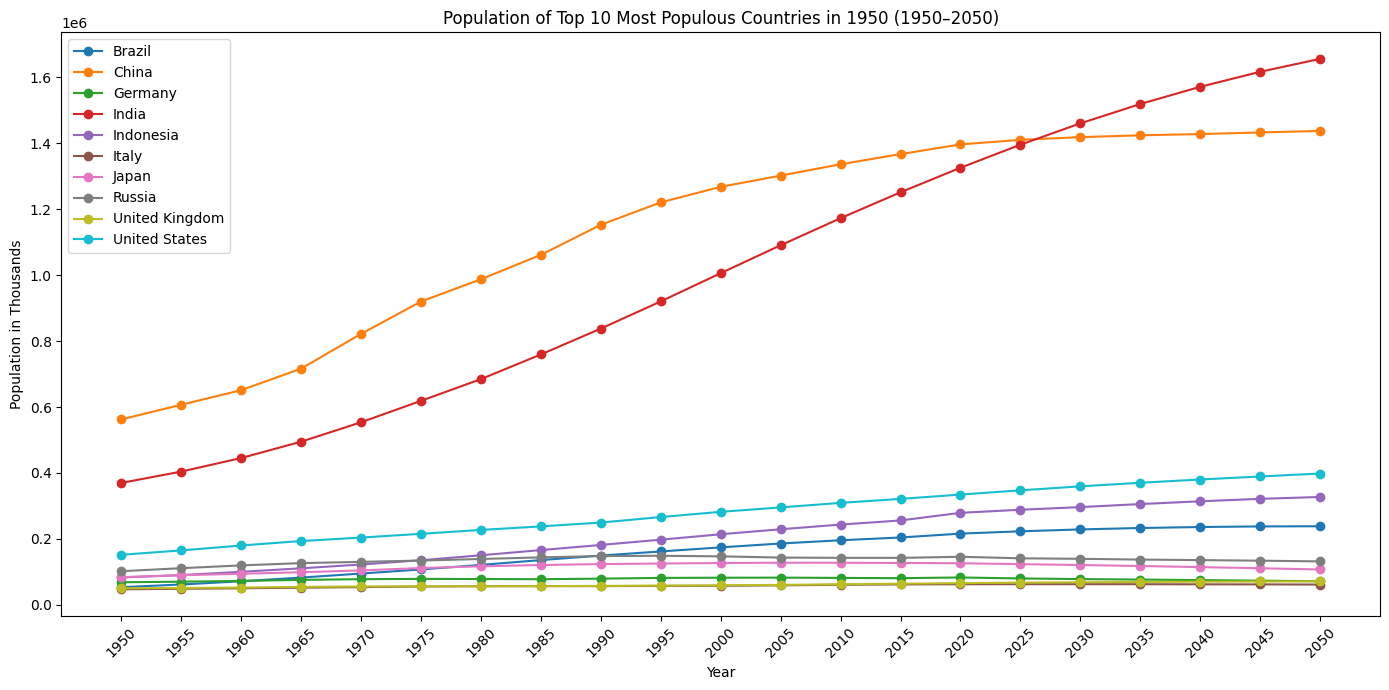

In [23]:
# Plot
plt.figure(figsize=(14, 7))

for _, row in top10_df.iterrows():
  country = row['Country']
  plt.plot(year_cols, row[year_cols], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population of Top 10 Most Populous Countries in 1950 (1950–2050)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

5. For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result: ![](https://i.imgur.com/ImXjIo0.png)

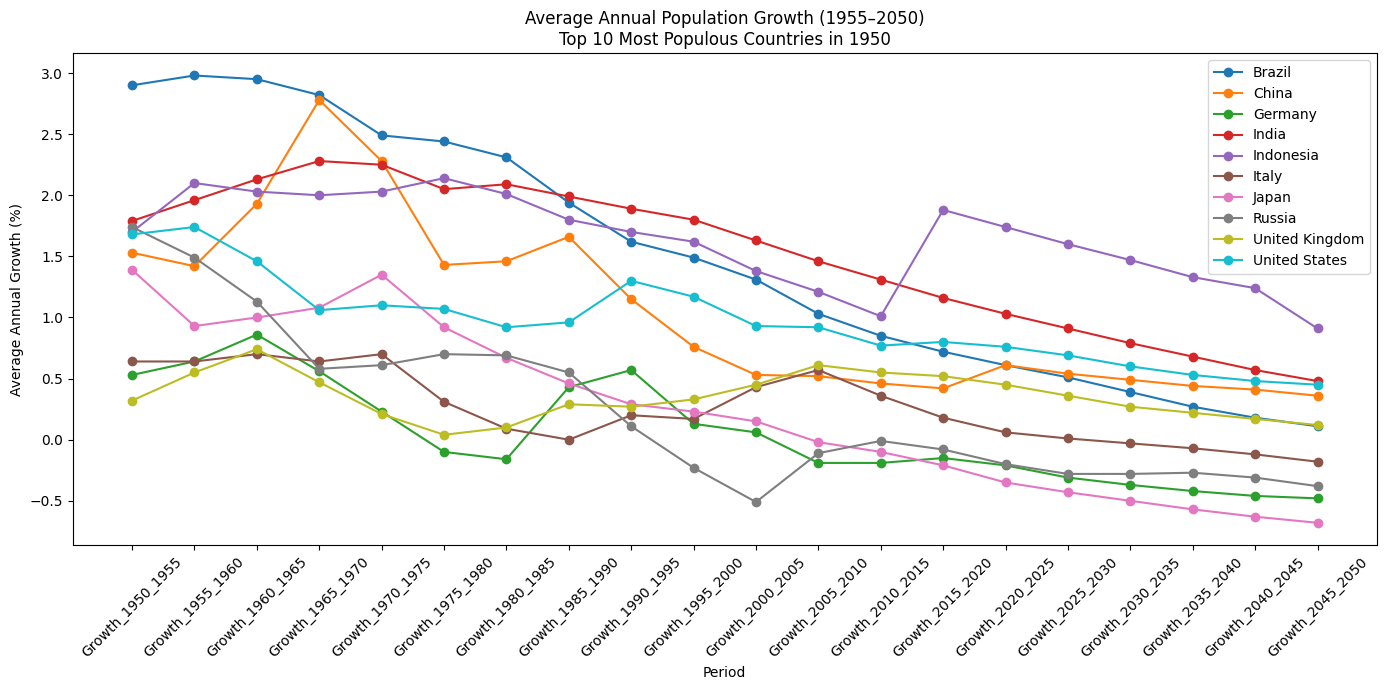

In [24]:
# Identify all growth columns (they start with "Growth_")
growth_cols = [col for col in merged_df.columns if col.startswith('Growth_')]

# Get top 10 countries by population in 1950 (excluding "World")
filtered_df = merged_df[merged_df['Country'] != 'World']
top10 = filtered_df[['Country', '1950']].sort_values(by='1950', ascending=False).head(10)
top10_countries = top10['Country'].tolist()

# Filter merged_df to include only top 10
top10_df = filtered_df[filtered_df['Country'].isin(top10_countries)]

# Plot average annual growth
plt.figure(figsize=(14, 7))

for _, row in top10_df.iterrows():
  plt.plot(growth_cols, row[growth_cols], marker='o', label=row['Country'])

plt.xlabel('Period')
plt.ylabel('Average Annual Growth (%)')
plt.title('Average Annual Population Growth (1955–2050)\nTop 10 Most Populous Countries in 1950')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

6. Map country names to their continents and add a 'continent' column storing the continent names corresponding to the countries. Plot the mean population and average annual growth over the years (1950-2050) for all continents.
- Hint: install the pycountry_convert package and use its methods for converting country names to continent names: https://pypi.org/project/pycountry-convert/

In [25]:
pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 19.5 MB/s eta 0:00:00


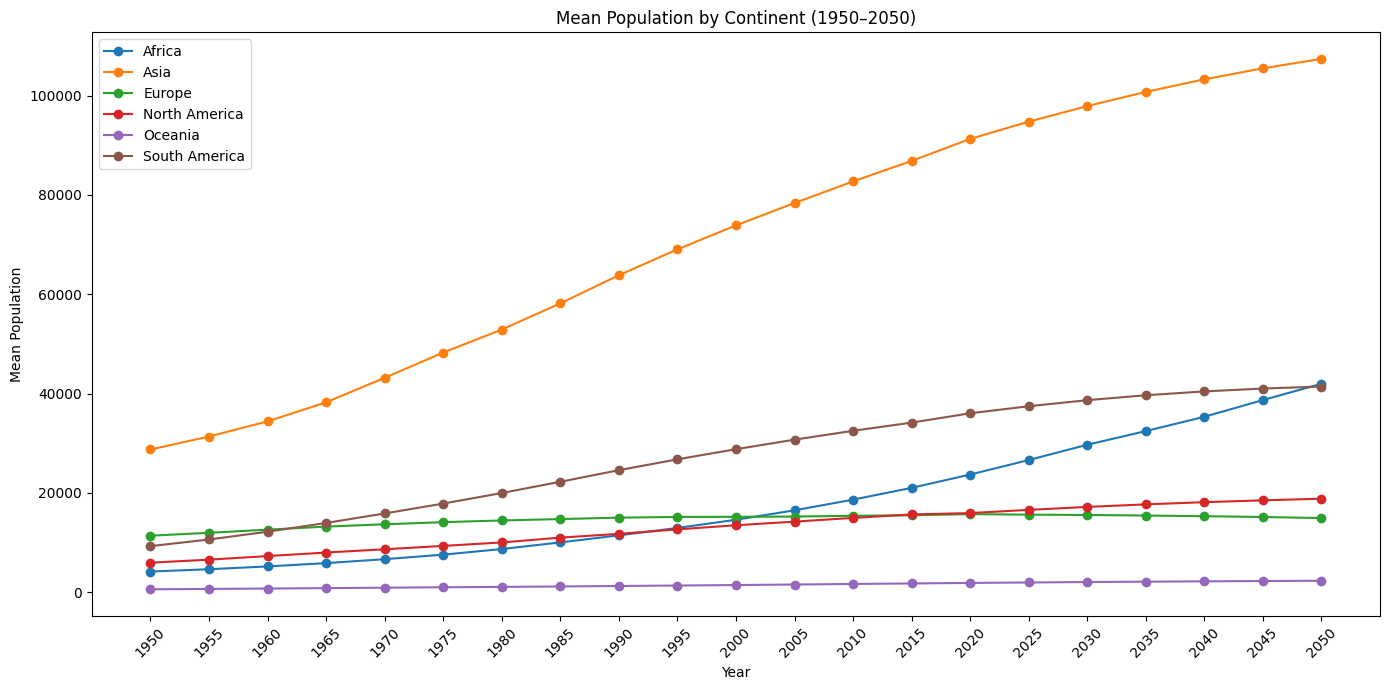

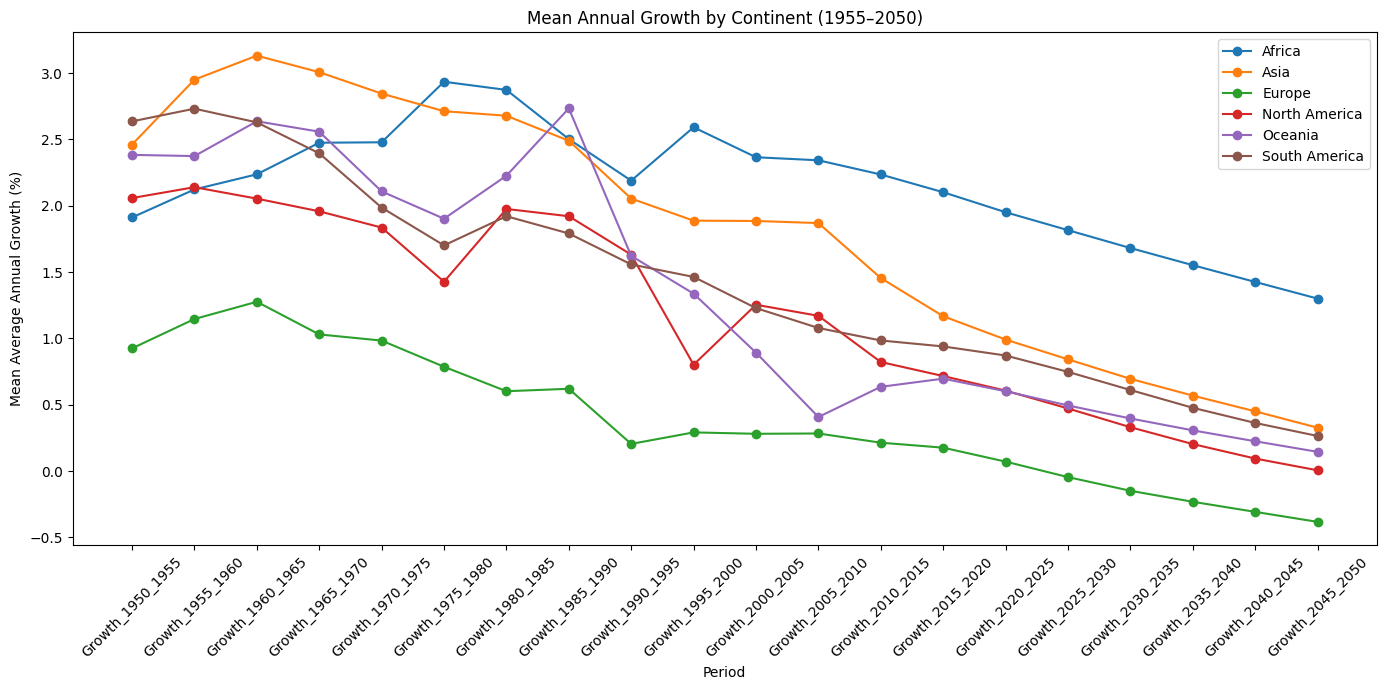

In [26]:
import pycountry_convert as pc

# Define helper function for continent mapping
def get_continent(country_name):
    try:
        # Fix known mismatches
        corrections = {
            'United States': 'United States of America',
            'Russia': 'Russian Federation',
            'Vietnam': 'Viet Nam',
            'Czech Republic': 'Czechia',
            'South Korea': 'Korea, Republic of',
            'North Korea': 'Korea, Democratic People\'s Republic of',
            'Iran': 'Iran, Islamic Republic of',
            'Syria': 'Syrian Arab Republic',
            'Democratic Republic of the Congo': 'Congo, The Democratic Republic of the',
            'Republic of the Congo': 'Congo',
            'Ivory Coast': 'Côte d\'Ivoire',
            'Palestine': 'Palestine, State of',
            'Bolivia': 'Bolivia, Plurinational State of',
            'Tanzania': 'Tanzania, United Republic of',
            'Venezuela': 'Venezuela, Bolivarian Republic of',
            'Laos': 'Lao People\'s Democratic Republic',
            'Moldova': 'Moldova, Republic of',
            'Micronesia': 'Micronesia, Federated States of',
            'Swaziland': 'Eswatini'
        }

        country_name = corrections.get(country_name, country_name)
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Unknown'

# Assume merged_df already exists and contains combined population data
merged_df['continent'] = merged_df['Country'].apply(get_continent)

# Filter out 'Unknown'
valid_df = merged_df[merged_df['continent'] != 'Unknown']

# Plot mean population by continent
year_cols = sorted([col for col in valid_df.columns if col.isdigit()], key=int)
continent_pop = valid_df.groupby('continent')[year_cols].mean()

plt.figure(figsize=(14, 7))
for continent in continent_pop.index:
  plt.plot(year_cols, continent_pop.loc[continent], marker='o', label=continent)

plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.title('Mean Population by Continent (1950–2050)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot mean average annual growth by continent
growth_cols = [col for col in valid_df.columns if col.startswith('Growth_')]
continent_growth = valid_df.groupby('continent')[growth_cols].mean()

plt.figure(figsize=(14, 7))
for continent in continent_growth.index:
  plt.plot(growth_cols, continent_growth.loc[continent], marker='o', label=continent)

plt.xlabel('Period')
plt.ylabel('Mean Average Annual Growth (%)')
plt.title('Mean Annual Growth by Continent (1955–2050)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

7. What are the top 5 countries with the highest population growth rate from 1950 to 2020? How does this compare to their projected growth rates from 2020 to 2050? Discuss any notable differences and other factors that should be also considered together with the historical growth data to predict future population changes.

In [27]:
# Filter only countries with non-null data in all three years
growth_df = merged_df[['Country', '1950', '2020', '2050']].dropna()

In [28]:
# Compute historical and projected growth rates
growth_df['Growth_1950_2020'] = (growth_df['2020'] - growth_df['1950']) / growth_df['1950'] * 100
growth_df['Growth_2020_2050'] = (growth_df['2050'] - growth_df['2020']) / growth_df['2020'] * 100

In [30]:
# Get top 5 by 1950–2020 growth
top5 = growth_df.sort_values(by='Growth_1950_2020', ascending=False).head(5)
top5[['Country', 'Growth_1950_2020', 'Growth_2020_2050']]

Country  Growth_1950_2020  Growth_2020_2050
162                 Qatar       9303.846154          4.662577
213  United Arab Emirates       8922.222222         23.445197
223        Western Sahara       6430.000000         79.785605
107                Kuwait       1964.827586         29.058116
182          Sint Maarten       1366.666667         22.727273

Between 1950 and 2020, the top five countries with the highest population growth rates were Qatar, the United Arab Emirates, Western Sahara, Kuwait, and Sint Maarten, with growth ranging from 1,367% to over 9,300%. This explosive growth, especially in Qatar and the UAE, was driven by economic booms, rapid urbanization, and large-scale labor migration tied to oil wealth. However, projections for 2020 to 2050 show significantly slower growth in these countries, with Qatar expected to grow by only 4.7%, and others like Kuwait and Sint Maarten projected to grow around 20-30%. An exception is Western Sahara, which, despite already substantial growth, is still projected to grow by nearly 80%, likely due to its small starting base and high fertility. This stark contrast highlights how historical growth is not always indicative of future trends. To more accurately predict future population changes, it is crucial to consider additional factors such as fertility rates, migration policies, urban capacity, economic diversification, climate change, and access to healthcare and education—especially those affecting women—as all can profoundly influence demographic trajectories beyond what historical data alone may suggest.

## Question 2 [40 marks]: The link: https://yuan-json-api.vercel.app/nobelprize/laureates is a RESTful API endpoint that returns information in JSON about Nobel Prize Laureates. Write Python code to use `requests` to call the RESTful API and read the JSON results. Write program to answer the following questions.
1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

## Answers:

1. Create a Pandas DataFrame containing the laureates information along with the information about their prizes and afflications in flat format. How many unique laureates are in the data set?

In [41]:
import requests
import pandas as pd

# Load JSON data
url = "https://yuan-json-api.vercel.app/nobelprize/laureates"
response = requests.get(url)
data = response.json()['laureates']

In [46]:
# Flatten laureates + prizes + affiliations
flat_records = []

for laureate in data:
  laureate_id = laureate.get('id')
  firstname = laureate.get('firstname')
  surname = laureate.get('surname')
  born = laureate.get('born')
  born_country = laureate.get('bornCountry')
  gender = laureate.get('gender')

  for prize in laureate.get('prizes', []):
    year = prize.get('year')
    category = prize.get('category')
    motivation = prize.get('motivation')
    share = prize.get('share')

    affiliations = prize.get('affiliations', [])
    # If empty list or [[]], record once with None
    if not affiliations or affiliations == [[]]:
      flat_records.append({
          'id': laureate_id,
          'firstname': firstname,
          'surname': surname,
          'born': born,
          'born_country': born_country,
          'gender': gender,
          'year': year,
          'category': category,
          'motivation': motivation,
          'share': share,
          'affiliation_name': None,
          'affiliation_country': None
          })
    else:
      for aff in affiliations:
        flat_records.append({
            'id': laureate_id,
            'firstname': firstname,
            'surname': surname,
            'born': born,
            'born_country': born_country,
            'gender': gender,
            'year': year,
            'category': category,
            'motivation': motivation,
            'share': share,
            'affiliation_name': aff.get('name'),
            'affiliation_country': aff.get('country')
            })

In [47]:
# Create DataFrame
df = pd.DataFrame(flat_records)

In [48]:
# Count unique laureates
unique_laureates = df['id'].nunique()
print(f"Number of unique laureates: {unique_laureates}")

Number of unique laureates: 922


2. Develop two distinct methods to identify laureates who have been awarded Nobel prizes more than once, whether in different years or in different categories. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).

 - Two separate and distinct approaches could be different algorithmic strategies, Python code, or data structures. For each approach, You need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.


This method identifies laureates who have received more than one Nobel Prize by grouping the dataset by their unique id and checking for multiple entries with different years or categories. Each row in the dataset represents a single Nobel Prize awarded to a person or organization, so if a laureate appears more than once with distinct prize years or categories, it means they've been awarded multiple times. By filtering those grouped records to include only laureates with more than one prize entry, this method successfully detects all individuals and organizations who have won multiple Nobel Prizes.

In [51]:
# Method 1
# Group by ID and count how many unique prizes each person received
multi_winners_method1 = (
    df.groupby('id')
    .filter(lambda x: x['year'].nunique() > 1 or x['category'].nunique() > 1)
    .sort_values(['id', 'year'])
)

# Display distinct laureates
method1_result = (
    multi_winners_method1[['id', 'firstname', 'surname', 'year', 'category']]
    .drop_duplicates()
    .sort_values(['id', 'year'])
)

print("Method 1: Laureates with multiple prizes (group by ID + count prizes):")
method1_result

Method 1: Laureates with multiple prizes (group by ID + count prizes):


id                                          firstname  \
227  217                                         Linus Carl   
228  217                                         Linus Carl   
233  222                                          Frederick   
234  222                                          Frederick   
503  482  Comité international de la Croix Rouge (Intern...   
504  482  Comité international de la Croix Rouge (Intern...   
505  482  Comité international de la Croix Rouge (Intern...   
537  515  Office of the United Nations High Commissioner...   
538  515  Office of the United Nations High Commissioner...   
5      6                                              Marie   
6      6                                              Marie   
67    66                                               John   
68    66                                               John   

                   surname  year   category  
227                Pauling  1954  chemistry  
228                Pauling  1962      peace  
233                 Sanger  1958  chemistry  
234                 Sanger  1980  chemistry  
503                   None  1917      peace  
504                   None  1944      peace  
505                   None  1963      peace  
537                   None  1954      peace  
538                   None  1981      peace  
5    Curie, née Sklodowska  1903    physics  
6    Curie, née Sklodowska  1911  chemistry  
67                 Bardeen  1956    physics  
68                 Bardeen  1972    physics

In this method, I simplify the task by first removing any exact duplicates of prize entries for each laureate, keeping only unique combinations of id, year, and category. I then group the data by laureate id and count how many distinct prizes each laureate has received. Any laureate associated with more than one unique prize is flagged as a multiple-time winner. This approach avoids overcounting due to repeated affiliations and ensures accuracy by focusing on prize uniqueness.


In [57]:
# Method 2
# Identify multiple Nobel prizes using groupby + count

# Keep only distinct (id, year, category) prize entries
prize_df = df[['id', 'firstname', 'surname', 'year', 'category']].drop_duplicates()

# Group by only 'id' to include both people and organizations
prize_counts = prize_df.groupby('id').size().reset_index(name='prize_count')

# Get laureate IDs with more than one prize
multi_winner_ids = prize_counts[prize_counts['prize_count'] > 1]['id']

# Filter full table to show all prize info for those IDs
method2_result = (
    df[df['id'].isin(multi_winner_ids)][['id', 'firstname', 'surname', 'year', 'category']]
    .drop_duplicates()
    .sort_values(['id', 'year'])
)

# Display result
print("Method 2: Laureates with Multiple Prizes:")
method2_result

Method 2: Laureates with Multiple Prizes:


id                                          firstname  \
227  217                                         Linus Carl   
228  217                                         Linus Carl   
233  222                                          Frederick   
234  222                                          Frederick   
503  482  Comité international de la Croix Rouge (Intern...   
504  482  Comité international de la Croix Rouge (Intern...   
505  482  Comité international de la Croix Rouge (Intern...   
537  515  Office of the United Nations High Commissioner...   
538  515  Office of the United Nations High Commissioner...   
5      6                                              Marie   
6      6                                              Marie   
67    66                                               John   
68    66                                               John   

                   surname  year   category  
227                Pauling  1954  chemistry  
228                Pauling  1962      peace  
233                 Sanger  1958  chemistry  
234                 Sanger  1980  chemistry  
503                   None  1917      peace  
504                   None  1944      peace  
505                   None  1963      peace  
537                   None  1954      peace  
538                   None  1981      peace  
5    Curie, née Sklodowska  1903    physics  
6    Curie, née Sklodowska  1911  chemistry  
67                 Bardeen  1956    physics  
68                 Bardeen  1972    physics

3. Develop two distinct methods to list the top 5 afiliations by the number of awards. Show the laureates, prizes, and affiliations information. Present your findings in a clear and organized manner. This could be displayed in a table format (like a pandas DataFrame).
 - Two separate and distinct approaches could be using different algorithmic strategies, Python code, or data structures For each approach, you need to provide a detailed explanation of the logic behind each method. The explanation should be in the form of comments within your code or as a separate written text accompanying your code.

In this method, I identify the top 5 affiliations by grouping the dataset by the affiliation_name column and counting how many Nobel Prizes are associated with each affiliation using the groupby and size() functions in pandas. After sorting the counts in descending order and selecting the top five, I filter the original dataset to include only those rows related to the top affiliations. Finally, I display the relevant columns, laureate names, prize years, categories, and affiliation names, to provide a clear and organized view of the top contributors to Nobel Prize-winning research. This method is ideal for tabular data and leverages the full power of pandas grouping operations.

In [58]:
# Method 1
# Group by affiliation name and count rows directly

# Remove null affiliations
affiliated_df = df[df['affiliation_name'].notna()]

# Group by affiliation and count how many prizes are linked
top5_affiliations = (
    affiliated_df.groupby('affiliation_name')
    .size()
    .reset_index(name='award_count')
    .sort_values(by='award_count', ascending=False)
    .head(5)
)

# Filter full data for those top affiliations
method1_result = affiliated_df[affiliated_df['affiliation_name'].isin(top5_affiliations['affiliation_name'])]

# Display final table
method1_result = method1_result[['affiliation_name', 'firstname', 'surname', 'year', 'category']].sort_values(['affiliation_name', 'year'])

print("Method 1: Top 5 Affiliations by Award Count:")
method1_result

Method 1: Top 5 Affiliations by Award Count:


affiliation_name       firstname   surname  \
27   California Institute of Technology (Caltech)  Robert Andrews  Millikan   
340  California Institute of Technology (Caltech)     Thomas Hunt    Morgan   
42   California Institute of Technology (Caltech)      Carl David  Anderson   
227  California Institute of Technology (Caltech)      Linus Carl   Pauling   
384  California Institute of Technology (Caltech)    George Wells    Beadle   
..                                            ...             ...       ...   
741                         University of Chicago        James J.   Heckman   
837                         University of Chicago        Roger B.   Myerson   
927                         University of Chicago       Eugene F.      Fama   
928                         University of Chicago      Lars Peter    Hansen   
990                         University of Chicago      Richard H.    Thaler   

     year   category  
27   1923    physics  
340  1933   medicine  
42   1936    physics  
227  1954  chemistry  
384  1958   medicine  
..    ...        ...  
741  2000  economics  
837  2007  economics  
927  2013  economics  
928  2013  economics  
990  2017  economics  

[117 rows x 5 columns]

This simplified method takes a different approach by using the value_counts() function on the affiliation_name column to quickly count how many times each institution appears in the dataset. We then select the top five affiliations based on this frequency and filter the dataset to include only those rows that match these top institutions. The filtered data is displayed with key information about the laureates and the prizes they received. This method is more intuitive and beginner-friendly, relying only on basic pandas operations while still producing accurate and informative results.



In [60]:
# Method 2
# Use value_counts to find top affiliations

# Drop missing affiliations
affiliated_df = df[df['affiliation_name'].notna()]

# Count occurrences using value_counts
top5_affiliations = affiliated_df['affiliation_name'].value_counts().head(5).index.tolist()

# Filter original data for these top affiliations
method2_result = affiliated_df[affiliated_df['affiliation_name'].isin(top5_affiliations)]

# Show relevant columns
method2_result = method2_result[['affiliation_name', 'firstname', 'surname', 'year', 'category']].drop_duplicates().sort_values(['affiliation_name', 'year'])

print("Method 2: Top 5 Affiliations by Award Count:")
method2_result

Method 2: Top 5 Affiliations by Award Count:


affiliation_name       firstname     surname  \
27   California Institute of Technology (Caltech)  Robert Andrews    Millikan   
340  California Institute of Technology (Caltech)     Thomas Hunt      Morgan   
42   California Institute of Technology (Caltech)      Carl David    Anderson   
227  California Institute of Technology (Caltech)      Linus Carl     Pauling   
384  California Institute of Technology (Caltech)    George Wells      Beadle   
..                                            ...             ...         ...   
870                      University of California       Oliver E.  Williamson   
888                      University of California            Saul  Perlmutter   
913                      University of California        Lloyd S.     Shapley   
915                      University of California        Randy W.    Schekman   
942                      University of California           Shuji    Nakamura   

     year   category  
27   1923    physics  
340  1933   medicine  
42   1936    physics  
227  1954  chemistry  
384  1958   medicine  
..    ...        ...  
870  2009  economics  
888  2011    physics  
913  2012  economics  
915  2013   medicine  
942  2014    physics  

[117 rows x 5 columns]

4. For the top 5 affiliations, develop two distinct visualizations to represent the counts of each Nobel prize category associated with these affiliations.

 - Two different types of plots could be bar chart, pie chart, line graph, etc. You also could choose to present the information in a single comprehensive figure or multiple figures for each affiliation.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse top 5 affiliation names
top5_affiliations_list = (
    df[df['affiliation_name'].notna()]['affiliation_name']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Filter full data for top 5 affiliations
top_aff_df = df[df['affiliation_name'].isin(top5_affiliations_list)]

# Group by affiliation and category to count number of prizes
category_counts = (
    top_aff_df.groupby(['affiliation_name', 'category'])
    .size()
    .reset_index(name='count')
)

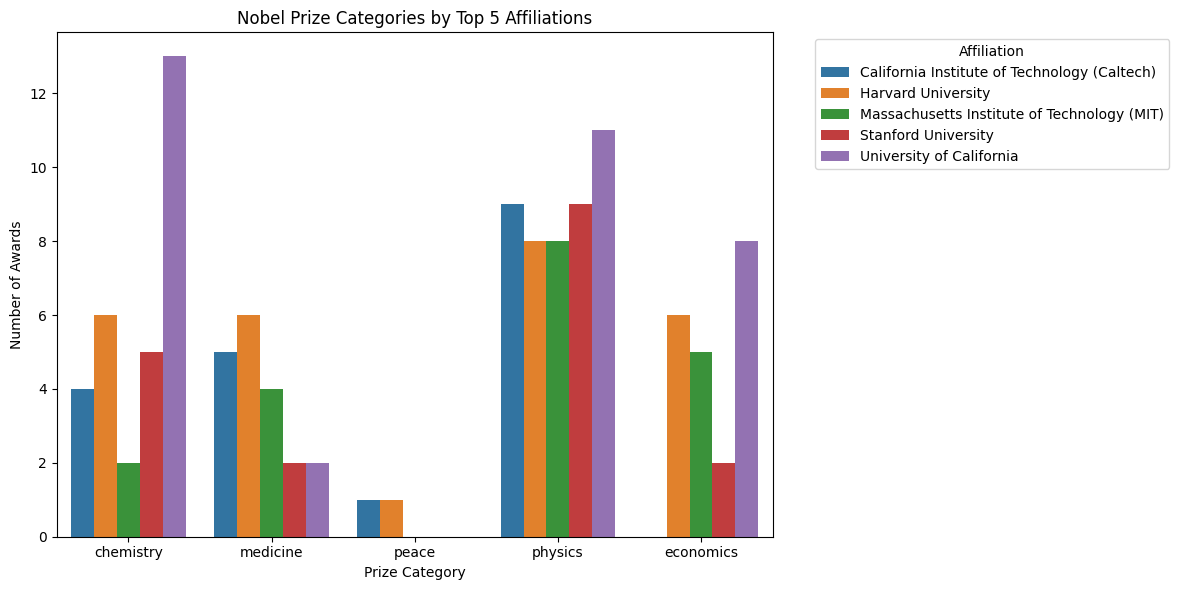

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, x='category', y='count', hue='affiliation_name')
plt.title('Nobel Prize Categories by Top 5 Affiliations')
plt.xlabel('Prize Category')
plt.ylabel('Number of Awards')
plt.legend(title='Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This bar chart compares how many Nobel Prizes each of the top 5 affiliations has received in different prize categories (e.g., physics, chemistry, medicine). Each category appears along the x-axis, while the height of each bar represents the number of prizes. Different colors represent different affiliations, allowing for easy side-by-side comparison. This visualization is ideal for identifying which affiliations are dominant in certain disciplines and how their contributions vary across fields.

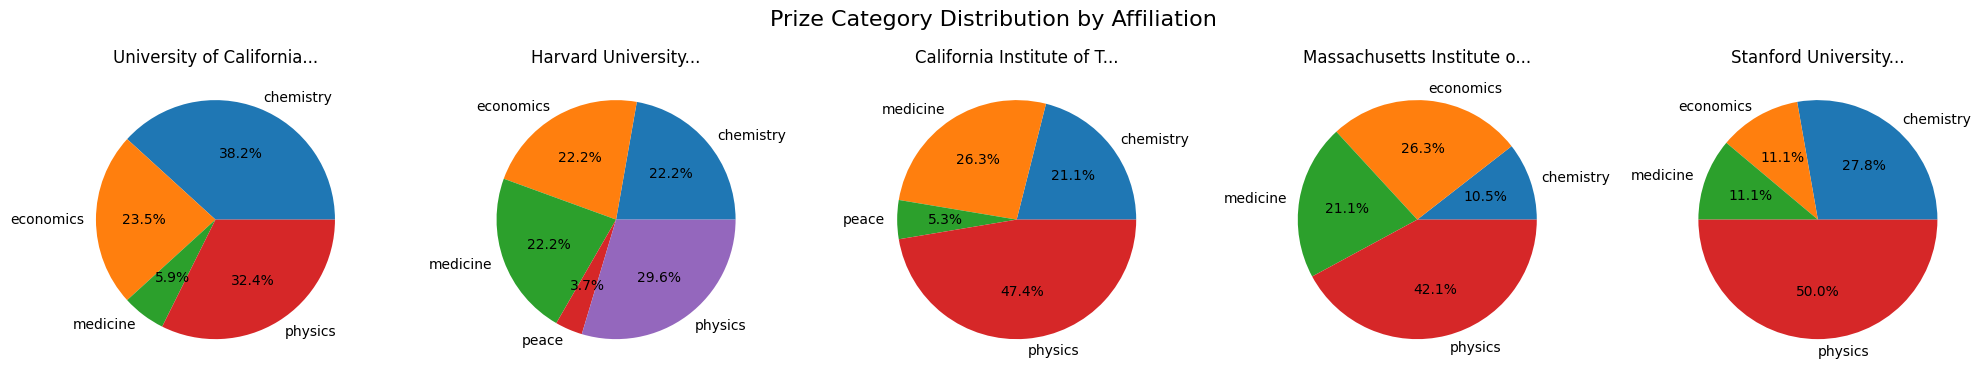

In [63]:
# Prepare separate category distributions per affiliation
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i, aff in enumerate(top5_affiliations_list):
    aff_data = category_counts[category_counts['affiliation_name'] == aff]
    axs[i].pie(aff_data['count'], labels=aff_data['category'], autopct='%1.1f%%')
    axs[i].set_title(f'{aff[:25]}...')  # Shorten long names for readability

plt.suptitle('Prize Category Distribution by Affiliation', fontsize=16)
plt.tight_layout()
plt.show()

This set of pie charts shows the distribution of Nobel Prize categories within each of the top 5 affiliations. Each pie chart represents one affiliation, and the slices show the percentage of that institution’s total Nobel Prizes in each category. This visualization helps highlight whether an affiliation’s Nobel contributions are concentrated in a single field or spread across several categories. It's especially useful for understanding each institution’s research focus or specialization.

## Question 3 [20 marks]: The file `weather-samples.csv` contains weather data measured at a weather station for a period of three years. Sensors at the weather station capture weather-related measurements such as air temperature, air pressure, and relative humidity. Load  the data to a pandas DataFrame. Write code to answer the following questions.

1. How many rows contain missing values?
2. How many columns contain missing values?
3. List the numbers of missing values for all columns.
4. For each missing value, fill up it with the mean value of the column where the missing value is located in.
5. Show there is no missing value after filling up.
6. Plot the histogram of the value `relative_humidity_3pm`.
7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

In [65]:
from google.colab import files
files.upload()
df = pd.read_csv("weather-samples.csv")

Saving weather-samples.csv to weather-samples.csv


In [66]:
df.head()

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471549            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0                0.0              24.328697   
2                    0.0               20.0               8.900000   
3                    0.0                0.0              12.189102   
4                    8.9            14730.0              92.410000   

   relative_humidity_3pm  
0              36.160000  
1              19.426597  
2              14.460000  
3              12.742547  
4              76.740000

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


## Answers:

1. How many rows contain missing values?

In [68]:
# Count rows with at least one missing value
missing_rows = df.isnull().any(axis=1).sum()

print(f"Number of rows with missing values: {missing_rows}")

Number of rows with missing values: 31


2. How many columns contain missing values?

In [69]:
# Count columns with at least one missing value
missing_columns = df.isnull().any().sum()

print(f"Number of columns with missing values: {missing_columns}")

Number of columns with missing values: 8


3. List the numbers of missing values for all columns.

In [71]:
# Count missing values for each column
missing_per_column = df.isnull().sum()

print("Missing values per column:")
missing_per_column

Missing values per column:


number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

4. For each missing value, fill up it with the mean value of the column where the missing value is located in.

In [73]:
# Fill missing values with the mean of each column
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0          0        918.060000     74.822000              271.100000   
1          1        917.347688     71.403843              101.935179   
2          2        923.040000     60.638000               51.000000   
3          3        920.502751     70.138895              198.832133   
4          4        921.160000     44.294000              277.800000   
...      ...               ...           ...                     ...   
1090    1090        918.900000     63.104000              192.900000   
1091    1091        918.710000     49.568000              241.600000   
1092    1092        916.600000     71.096000              189.300000   
1093    1093        912.600000     58.406000              172.700000   
1094    1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.863283   
1               2.443009              140.471549            3.533324   
2              17.067852               63.700000           22.100967   
3               4.337363              211.203341            5.190045   
4               1.856660              136.500000            2.863283   
...                  ...                     ...                 ...   
1090            3.869906              207.300000            5.212070   
1091            1.811921              227.400000            2.371156   
1092            3.064608              200.800000            3.892276   
1093            3.825167              189.100000            4.764682   
1094            3.265932              125.900000            4.451511   

      rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                       0.0                0.0              42.420000   
1                       0.0                0.0              24.328697   
2                       0.0               20.0               8.900000   
3                       0.0                0.0              12.189102   
4                       8.9            14730.0              92.410000   
...                     ...                ...                    ...   
1090                    0.0                0.0              26.020000   
1091                    0.0                0.0              90.350000   
1092                    0.0                0.0              45.590000   
1093                    0.0                0.0              64.840000   
1094                    0.0                0.0              14.560000   

      relative_humidity_3pm  
0                 36.160000  
1                 19.426597  
2                 14.460000  
3                 12.742547  
4                 76.740000  
...                     ...  
1090              38.180000  
1091              73.340000  
1092              52.310000  
1093              58.280000  
1094              15.100000  

[1095 rows x 11 columns]

5. Show there is no missing value after filling up.

In [75]:
# Check if any missing values remain
no_missing = df_filled.isnull().sum().sum()

print(f"Missing values remaining: {no_missing}")

Missing values remaining: 0


6. Plot the histogram of the value `relative_humidity_3pm`.

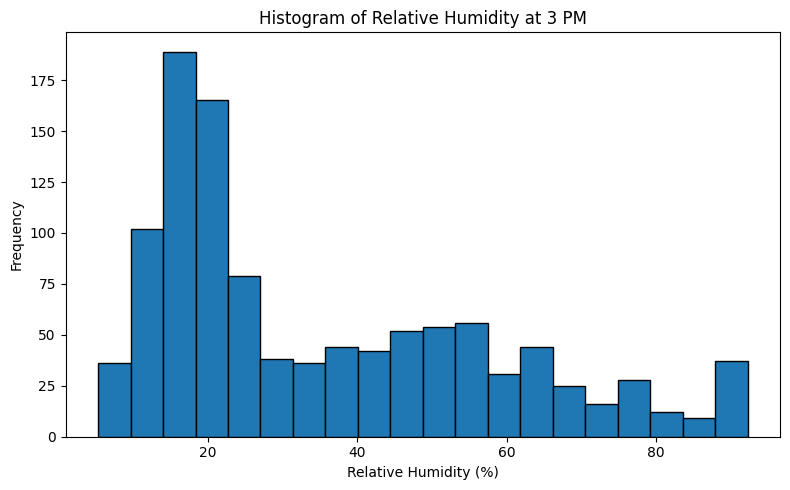

In [77]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['relative_humidity_3pm'], bins=20, edgecolor='black')
plt.title('Histogram of Relative Humidity at 3 PM')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()

7. A weather forecast problem is to predict a measure in a future time using the measurements at earlier moments. For example, the data set contains several measurements at 9am and one measurement `relative_humidity_3pm` at 3pm. It is interesting to know whether we can predict `relative_humidity_3pm` using the values at 9am. This is a typical supervised machine learning problem. Using plots to visualize the relationships between the measurements at 9am and `relative_humidity_3pm`. What do you find? Discuss the impacts of the measurements at 9am to the values of `relaive_humidity_3pm`.

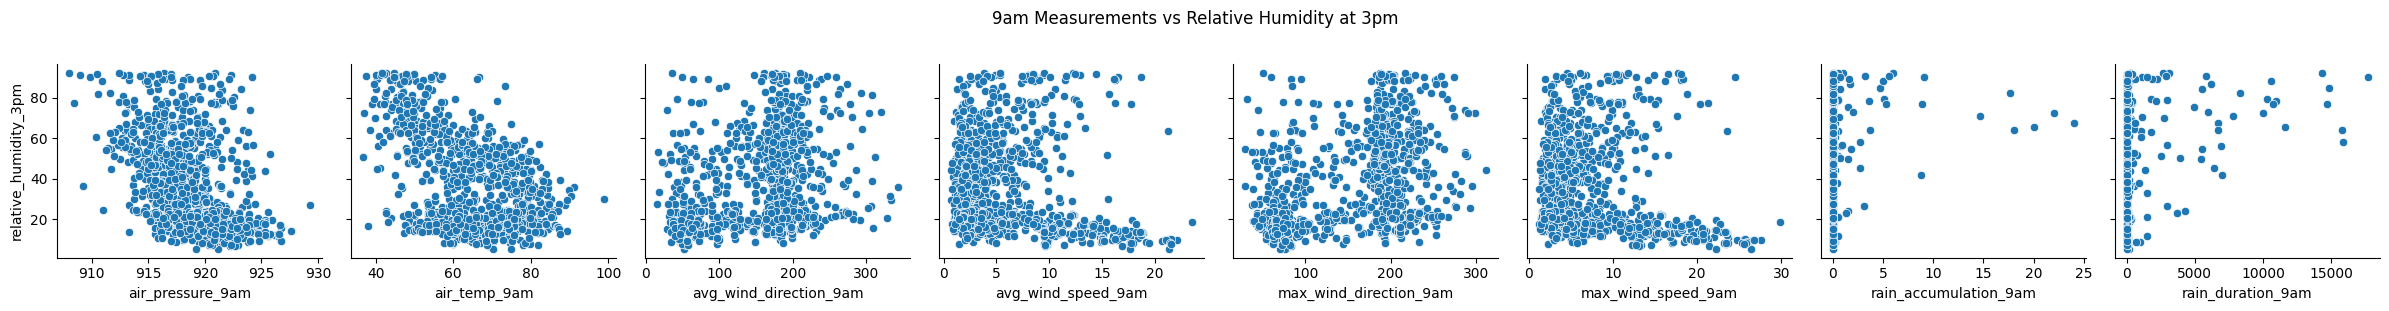

In [78]:
# Select 9am features and the target
columns_9am = [
    'air_pressure_9am', 'air_temp_9am',
    'avg_wind_direction_9am', 'avg_wind_speed_9am',
    'max_wind_direction_9am', 'max_wind_speed_9am',
    'rain_accumulation_9am', 'rain_duration_9am',
    'relative_humidity_3pm'
]

# Plot scatter plots for each 9am measurement vs humidity at 3pm
sns.pairplot(df[columns_9am], y_vars='relative_humidity_3pm', x_vars=columns_9am[:-1], kind='scatter', height=3)
plt.suptitle('9am Measurements vs Relative Humidity at 3pm', y=1.02)
plt.tight_layout()
plt.show()

The scatter plots reveal that several 9am measurements have notable relationships with relative humidity at 3pm. Most prominently, air temperature at 9am shows a strong negative correlation with afternoon humidity, higher morning temperatures generally lead to lower humidity later in the day. Air pressure at 9am also appears to have a weak negative relationship, where lower pressure is mildly associated with higher humidity. Rain-related features, including rain accumulation and rain duration at 9am, display a positive relationship with 3pm humidity, suggesting that rainfall in the morning tends to keep the air moist throughout the day. On the other hand, average and maximum wind speeds at 9am show slight negative trends, potentially indicating that stronger winds contribute to drier conditions by 3pm. However, wind direction features appear largely random and uncorrelated, implying limited predictive value. Overall, air temperature, pressure, and rain metrics are the most influential morning factors for predicting afternoon humidity.

## Question 4 [20 marks]: Download the dataset: `activity-data.csv` and load it into a data frame. The data set contains the time series outputs of a wearable clinical device measuring a patient's activities. Write code to answer the following questions:
1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.
2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?
3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.
4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.
5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data
6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.
7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

## Answers:

1. What is the total number of days covered by the dataset? Provide a list of all the distinct calendar dates on which recordings were made.

In [80]:
files.upload()
df = pd.read_csv("activity-data(1).csv")
df.info()

Saving activity-data(1).csv to activity-data(1) (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31740 entries, 0 to 31739
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  31740 non-null  object 
 1   ACTDT     31740 non-null  object 
 2   Day       31740 non-null  float64
 3   Week      29643 non-null  float64
 4   Time      31740 non-null  object 
 5   Hour      31740 non-null  int64  
 6   Minute    31740 non-null  int64  
 7   Steps     31740 non-null  int64  
 8   XCnt      31740 non-null  int64  
 9   YCnt      31740 non-null  int64  
 10  ZCnt      31740 non-null  int64  
 11  Calories  31740 non-null  float64
 12  Wear      31740 non-null  bool   
 13  WearSens  31740 non-null  int64  
dtypes: bool(1), float64(3), int64(7), object(3)
memory usage: 3.2+ MB


In [81]:
df.head()

Datetime       ACTDT  Day  Week      Time  Hour  Minute  Steps  \
0   06/22/2016 9:56:00  06/22/2016  1.0   1.0   9:56:00     9      56      0   
1   06/22/2016 9:57:00  06/22/2016  1.0   1.0   9:57:00     9      57      0   
2   06/22/2016 9:58:00  06/22/2016  1.0   1.0   9:58:00     9      58      0   
3   06/22/2016 9:59:00  06/22/2016  1.0   1.0   9:59:00     9      59      0   
4  06/22/2016 10:00:00  06/22/2016  1.0   1.0  10:00:00    10       0      0   

   XCnt  YCnt  ZCnt  Calories  Wear  WearSens  
0     0     0     0       0.0  True         3  
1     0     0     0       0.0  True         3  
2     0     0     0       0.0  True         3  
3     0     0     0       0.0  True         3  
4     0     0     0       0.0  True         3

In [82]:
# Convert 'Datetime' to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract just the date
df['Date'] = df['Datetime'].dt.date

# Get unique dates
unique_dates = sorted(df['Date'].unique())
total_days = len(unique_dates)

In [85]:
# Output
print(f"Total number of days covered: {total_days}")
print("Distinct calendar dates:")
for date in unique_dates:
    print(date)

Total number of days covered: 23
Distinct calendar dates:
2016-06-22
2016-06-23
2016-06-24
2016-06-25
2016-06-26
2016-06-27
2016-06-28
2016-06-29
2016-06-30
2016-07-01
2016-07-02
2016-07-03
2016-07-04
2016-07-05
2016-07-06
2016-07-07
2016-07-08
2016-07-09
2016-07-10
2016-07-11
2016-07-12
2016-07-13
2016-07-14


2. Can you plot the number of steps against the recording 'Datetime', ensuring that each tick on the x-axis corresponds to a unique date in the dataset?


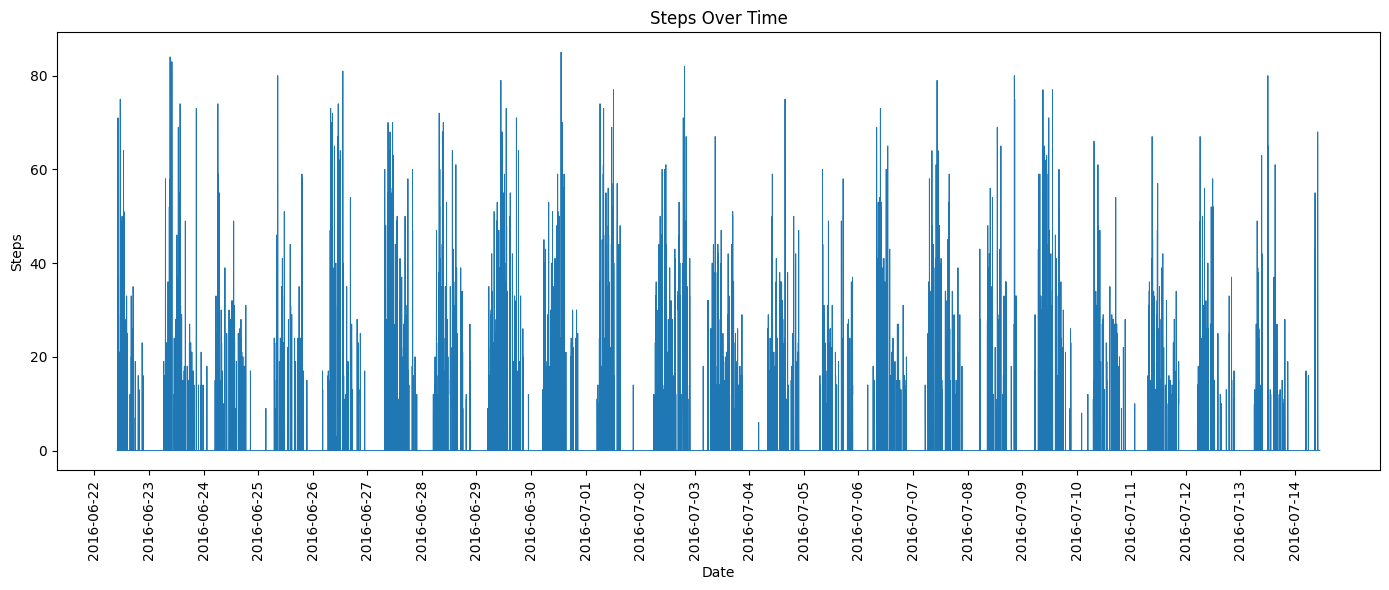

In [86]:
# Plot Steps vs. Datetime
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Steps'], linewidth=0.7)

# Format x-axis: set major ticks to unique dates only
unique_dates = sorted(df['Datetime'].dt.date.unique())
plt.xticks(pd.to_datetime(unique_dates), rotation=90)

# Labels and title
plt.title("Steps Over Time")
plt.xlabel("Date")
plt.ylabel("Steps")
plt.tight_layout()
plt.grid(False)
plt.show()

3. Create a plot that shows the daily average number of steps in comparison with the steps recorded each minute. The plot should clearly differentiate between the daily mean and individual minute measurements.

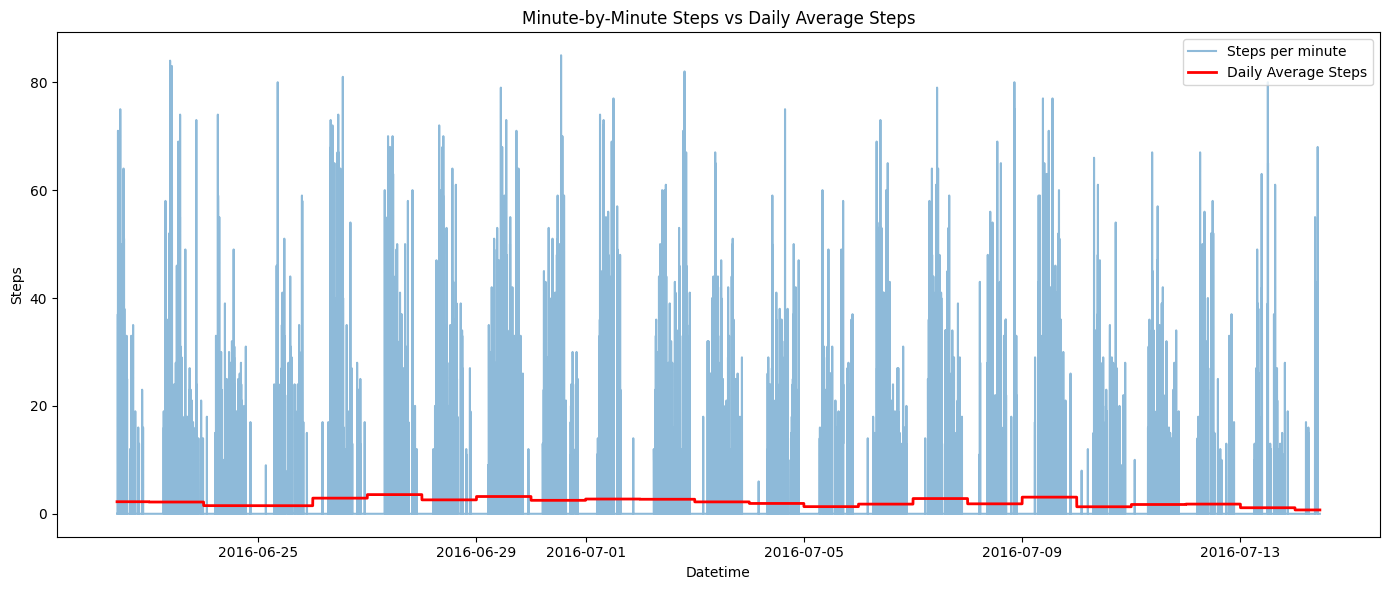

In [89]:
# Calculate daily average steps
daily_avg = df.groupby('Date')['Steps'].mean().reset_index()
daily_avg = daily_avg.rename(columns={'Steps': 'Daily_Avg_Steps'})

# Merge daily averages back to main DataFrame
df = df.merge(daily_avg, on='Date', how='left')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Steps'], label='Steps per minute', alpha=0.5)
plt.plot(df['Datetime'], df['Daily_Avg_Steps'], color='red', label='Daily Average Steps', linewidth=2)

# Formatting
plt.title('Minute-by-Minute Steps vs Daily Average Steps')
plt.xlabel('Datetime')
plt.ylabel('Steps')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

4. How does the average step count change during 15-minute intervals throughout the day? Compute and plot these averages across all days in the dataset.

In [99]:
print(df.columns.tolist())

['Day', 'Week', 'Time', 'Hour', 'Minute', 'Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories', 'Wear', 'WearSens', 'Date', 'Daily_Avg_Steps_x', 'Daily_Avg_Steps_y', 'Daily_Avg_Steps']


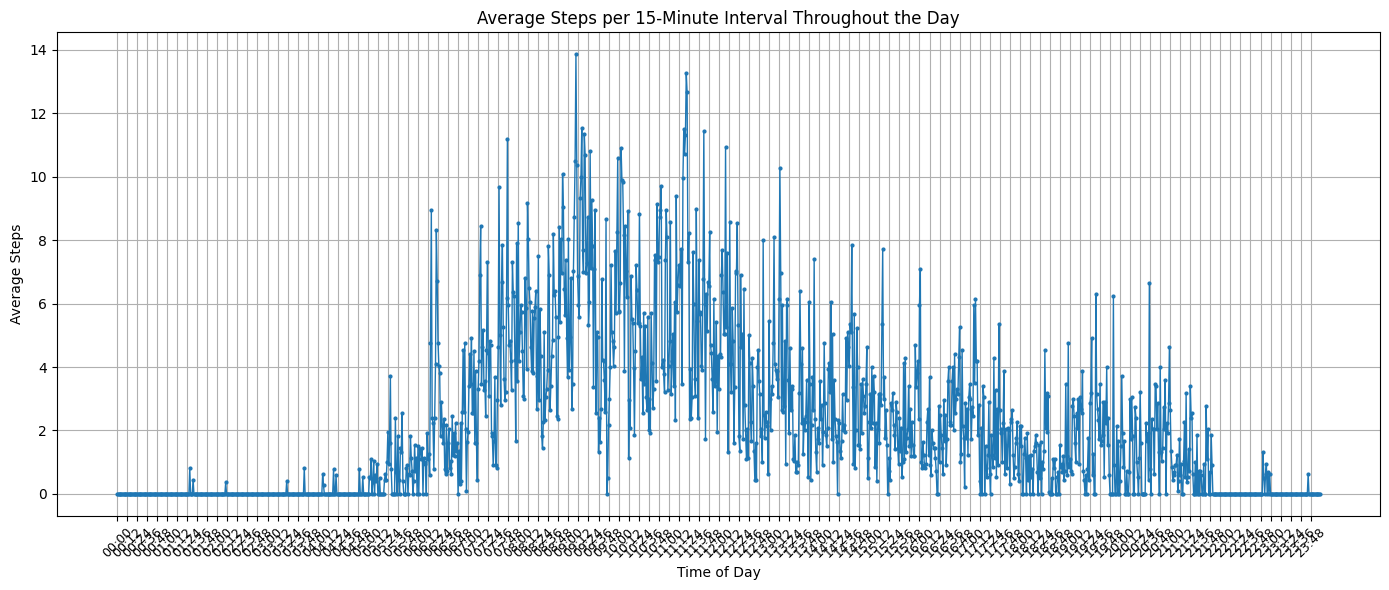

In [105]:
# Convert 'Time' column to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Group by Time and calculate average steps
avg_steps_by_time = df.groupby('Time')['Steps'].mean()

# Format time strings
time_labels = [t.strftime('%H:%M') for t in avg_steps_by_time.index]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(time_labels, avg_steps_by_time.values, marker='o', markersize=2, linewidth=1)

# Show every 12th label (1 every 3 hours)
skip = 12
plt.xticks(ticks=range(0, len(time_labels), skip),
           labels=time_labels[::skip],
           rotation=45, fontsize=9)

plt.title("Average Steps per 15-Minute Interval Throughout the Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Steps")
plt.tight_layout()
plt.grid(True)
plt.show()

5. For each day represented in the dataset, what is the percentage of minutes without records (missing records)? Please calculate and present this data

In [108]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Count number of records per day
minutes_per_day = df.groupby(df['Date'].dt.date).size()

# Expected number of minutes per day is 1440
expected_minutes = 1440

# Calculate missing percentages
missing_percentage = (1 - minutes_per_day / expected_minutes) * 100

# Format result
result = missing_percentage.reset_index()
result.columns = ['Date', 'Missing_Minutes_Percentage']

# Show result
result

Date  Missing_Minutes_Percentage
0   2016-06-22                   41.388889
1   2016-06-23                    0.000000
2   2016-06-24                    0.000000
3   2016-06-25                    0.000000
4   2016-06-26                    0.000000
5   2016-06-27                    0.069444
6   2016-06-28                    0.000000
7   2016-06-29                    0.000000
8   2016-06-30                    0.000000
9   2016-07-01                    0.000000
10  2016-07-02                    0.000000
11  2016-07-03                    0.000000
12  2016-07-04                    0.000000
13  2016-07-05                    0.000000
14  2016-07-06                    0.000000
15  2016-07-07                    0.000000
16  2016-07-08                    0.000000
17  2016-07-09                    0.000000
18  2016-07-10                    0.000000
19  2016-07-11                    0.000000
20  2016-07-12                    0.000000
21  2016-07-13                    0.000000
22  2016-07-14                   54.375000

6. For minutes with missing data, fill in 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories' using the mean values for those minutes across all days where data is available. Save the completed dataset to a DataFrame named `all_activity_df` with columns for 'Datetime', 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'.


In [110]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [114]:
# Ensure both Date and Time are string types for concatenation
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Set Datetime as index
df.set_index('Datetime', inplace=True)

# Create a full range of minutes
all_minutes = pd.date_range(start=df.index.min().normalize(),
                            end=df.index.max().normalize() + pd.Timedelta(days=1),
                            freq='min')
full_df = pd.DataFrame(index=all_minutes)

# Merge and extract 'Minute' part for grouping
merged = full_df.merge(df[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']], how='left', left_index=True, right_index=True)
merged['Minute'] = merged.index.time

# Calculate mean per minute
minute_means = merged.groupby('Minute')[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].mean()

# Fill missing values
for col in ['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']:
    merged[col] = merged.apply(
        lambda row: minute_means.loc[row['Minute'], col] if pd.isna(row[col]) else row[col],
        axis=1
    )

# Final DataFrame
all_activity_df = merged[['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']].copy()
all_activity_df.reset_index(inplace=True)
all_activity_df.rename(columns={'index': 'Datetime'}, inplace=True)

In [119]:
all_activity_df.head()

Datetime  Steps       XCnt        YCnt        ZCnt  Calories
0 2016-06-22 00:00:00    0.0  61.409091  104.863636   70.363636  0.171238
1 2016-06-22 00:01:00    0.0  41.772727  101.590909   36.454545  0.148915
2 2016-06-22 00:02:00    0.0  46.227273   52.772727   43.727273  0.068392
3 2016-06-22 00:03:00    0.0  91.409091  164.772727  112.863636  0.275454
4 2016-06-22 00:04:00    0.0  51.333333  137.666667   71.428571  0.190698

7. Could you create plots that illustrate the pairwise relationships between 'Steps', 'XCnt', 'YCnt', 'ZCnt', and 'Calories'? After analyzing these plots, what conclusions can you draw about the relationships and potential correlations between these variables?

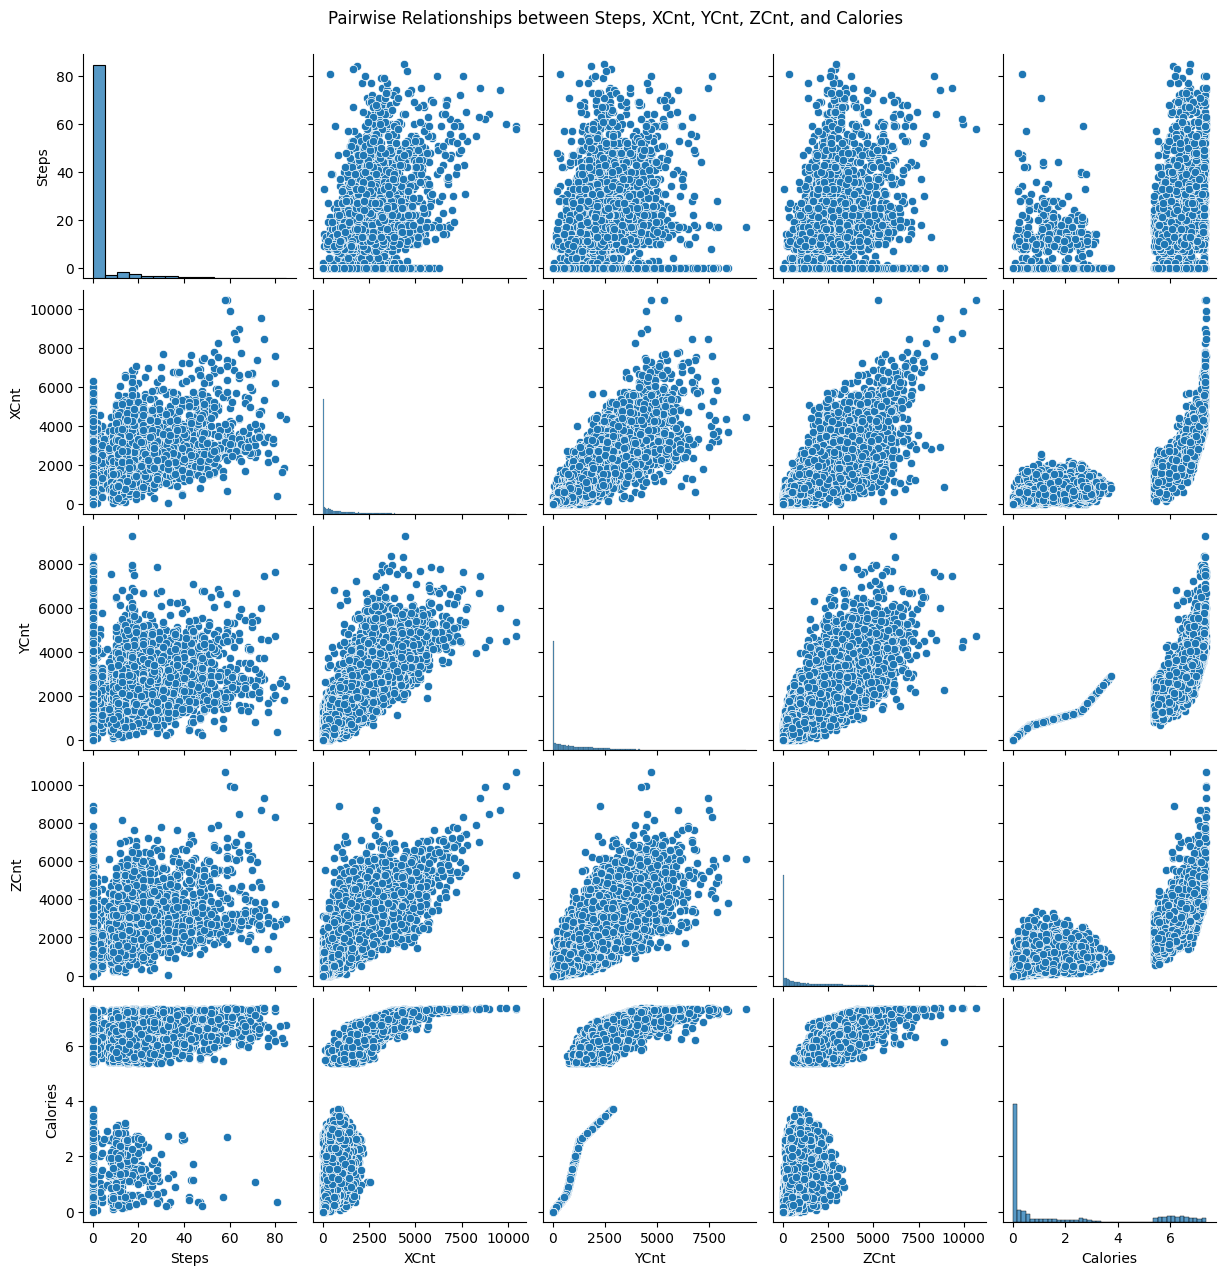

In [120]:
# Select relevant columns for pairplot
selected_columns = ['Steps', 'XCnt', 'YCnt', 'ZCnt', 'Calories']
subset_df = df[selected_columns].dropna()  # Drop rows with missing values in selected columns

# Create pairplot
sns.pairplot(subset_df)
plt.suptitle("Pairwise Relationships between Steps, XCnt, YCnt, ZCnt, and Calories", y=1.02)
plt.show()

Strong positive correlation exists between XCnt, YCnt, ZCnt, and Calories, suggesting all three movement counts contribute significantly to calorie estimation.

Steps vs Calories shows two distinct clusters, indicating that in some cases, calories may be consumed without recorded steps—possibly due to upper-body movement or sensor placement.

Steps vs movement counts (X/Y/Z) show moderate correlation, but not linear, suggesting that steps alone do not fully capture total movement.

XCnt vs YCnt vs ZCnt show a tightly clustered positive relationship, indicating synchronized movement across axes.

Most variables have a skewed distribution, with a majority of records concentrated near zero—implying long durations of inactivity.